<a href="https://colab.research.google.com/github/Pietrofox/Intro_Machine_Learning/blob/main/notebooks/Lab-2.Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Trade Off

In [6]:
# Import NumPy for numerical operations and data manipulation
import numpy as np

# Import Matplotlib for data visualization and plotting
import matplotlib.pyplot as plt

# Import the 'randint' function from the 'random' library for generating random integers
from random import randint

# Import the constant 'PI' from the 'math' library for mathematical calculations
from math import pi as PI

# Import mean_squared_error for evaluating regression models by calculating mean squared error
from sklearn.metrics import mean_squared_error

# Import train_test_split for splitting datasets into training and testing subsets
from sklearn.model_selection import train_test_split

* Generate data from the model $y=\sin(\pi\cdot x)+\varepsilon$, $\varepsilon\sim\mathcal{N}(0, \sigma)$
* Interpolate the data with different polynomial fittings.
* To test for generalization error we split the data into training and test.

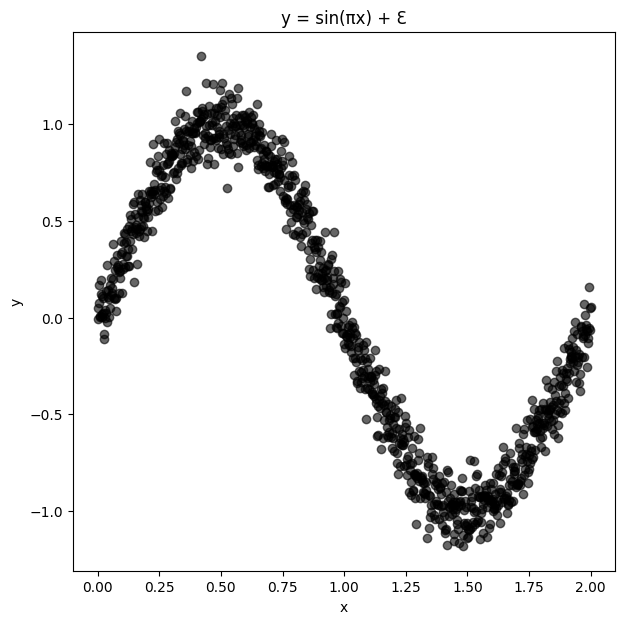

In [23]:
# Uncomment the line below if you want to ensure reproducibility of random numbers.
# It sets a seed for random number generation.
np.random.seed(42)

# Define the number of observations.
NUM_OBS = 1000

# Generate an array of predictor values 'x' that are evenly spaced from 0 to 2.
x = np.linspace(0, 2, num=NUM_OBS)

# Generate random noise 'eps' using a normal distribution with mean 0 and standard deviation 0.1.
eps = np.random.normal(0, 0.1, NUM_OBS)

# Generate the outcome variable 'y' as the sine of 'πx' plus the noise 'eps'.
y = np.sin(PI * x) + eps

# Create a figure for plotting with a specified size.
fig = plt.figure(figsize=(7, 7))

# Create an axes object for the plot.

# Set the title of the plot.
plt.title('y = sin(πx) + Ɛ')

# Set the label for the x-axis.
plt.xlabel("x")

# Set the label for the y-axis.
plt.ylabel("y")

# Create a scatter plot of 'x' versus 'y' with black markers ('k').
plt.scatter(x, y, c='k', alpha = 0.6)
plt.show()


We use the Mean Square error to measure the fit error.

$$
MSE = \frac{1}{N}\sum_{i=1}^{N}\;(y_{i}-y_{i}^{pred})^{2}
$$

$$
MSE = Bias^{2}+ Variance + Irriducible Error
$$


**BIAS**


**Bias takes into account the difference between the model prediction and the real outcome**.

It depends mainly on the model we choose to solve our problem, and how the model assumptions can suitably interpret the relationship between predictors and outcome.

By observing our train set plot, we notice a non-linear trend. If we chose to model the relationship between $x$ and $y$ with a linear regression, the model assumptions would clearly fail to explain our function, which we know to be non-linear. In this case, we would obtain a model with high bias.

We can empirically assess that a model suffers from high bias because it shows a **high error on the train set**. Or, in other words, a low training performance: this condition goes under the name of **underfitting**.

High bias:

* Model assumptions fail to explain the relationship between predictors and outcome.

* Involves “simpler” (less flexible) models, such as linear regression.

* Leads to underfitting (poor train set performances).

**VARIANCE**

**Variance measures how different choices of the train sets would affect the the model parameters**.

When we train a machine learning model, we want that, by selecting a slightly different train set, the function would not change significantly. Otherwise, we would have obtained a model unable to generalize in front of small variations in the input data: this goes under the name of overfitting.

Intuitively, models with fewer assumptions do not suffer from high variance, as they do not change in front of small variations in the train set. Therefore, high variance is a problem that affects more flexible models, such as decision trees.

As the model is complex enough to overfit on a train set, we would expect high train performances (or low training error), but also poor test performances, as the model would require significant changes in the parameters to explain small variations in the data.

High variance:

- Involves more “complex” models (more flexible), such as decision trees.

- Leads to overfitting (poor test set performances).

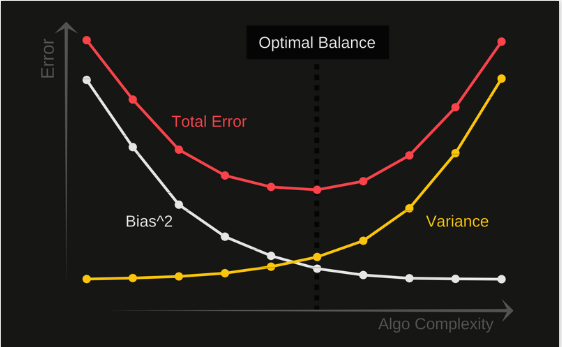

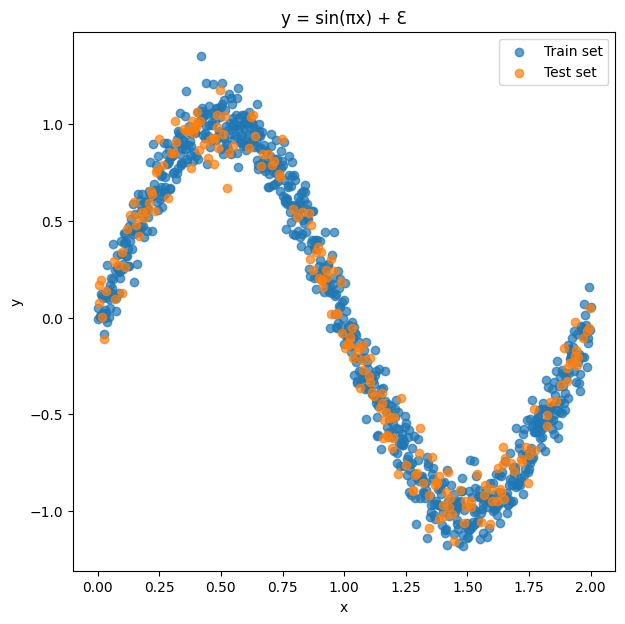

In [11]:
# splitting training and test data using sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
plt.title('y = sin(πx) + Ɛ')
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(x_train, y_train, label = "Train set", alpha = 0.7) #alfa è il canale alfa, serve a rendere più trasparenti i punti
plt.scatter(x_test, y_test, label = "Test set", alpha = 0.7)
plt.legend()

NameError: name 'y_eval' is not defined

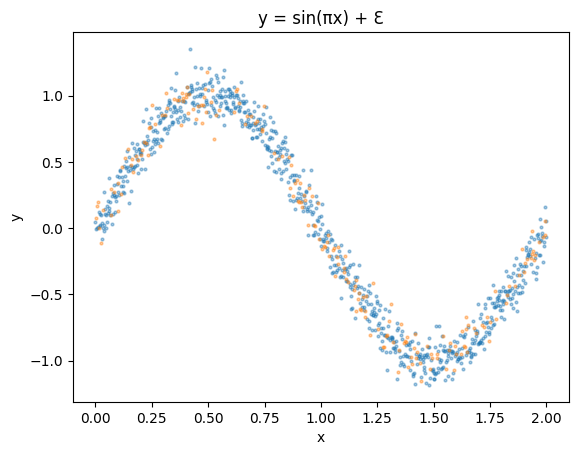

In [24]:
# trying to fit a model using np.polyfit,
# read the documentation here https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
model_coef = np.polyfit(x_train, y_train, 3)

# evaluate the model on the interval 0,2 use np.polyval


# https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

x_eval = np.linspace(0,2,512)
y_eval = np.polyval(None)



plt.title('y = sin(πx) + Ɛ')
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(x_train, y_train, label = "Train set", alpha = 0.4, s = 4)
plt.scatter(x_test, y_test, label = "Test set", alpha = 0.4, s = 4)
plt.plot(x_eval, y_eval, "b-.")
plt.legend()

/tmp/ipython-input-1461970564.py:18: RankWarning: Polyfit may be poorly conditioned
  model=np.polyfit(x_train, y_train, deg=m)
/tmp/ipython-input-1461970564.py:18: RankWarning: Polyfit may be poorly conditioned
  model=np.polyfit(x_train, y_train, deg=m)


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

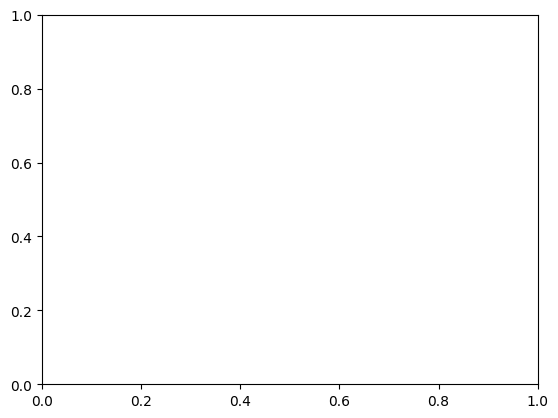

In [53]:
# compute the mse for a combination of model_coeff, x, y)

def mse(model, x_eval, y_eval):
    pass

# make a function that explores polynomial fits from 2 to 20 params and finds
# the best model using test mse produce a plot of the mse on both train and test
# mse as a function of the number of parameters

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


def test_param_range(x_train, y_train, x_test, y_test, m_min, m_max):
    mse_train = []
    mse_test  = []
    for m in range(m_min, m_max):
      model=np.polyfit(x_train, y_train, deg=m)
      y_test_pred=np.polyval(model,x_test)
      mse_test.append(mse(y_test,y_test_pred))
    return mse_train, mse_test



mse_train, mse_test = test_param_range(x_train, y_train, x_test, y_test, 2, 20)
ms = np.linspace(2,20,20)
plt.plot(ms, mse_train, label = "Train set")
plt.plot(ms, mse_test, label = "Test set")
plt.legend()

Even for $m = 20$ we are able to get, sort of a good fit, but what happens when we reduce the number of points?


In [68]:
# select one every 40 points


x_train_slice = x_train[::40]
y_train_slice = y_train[::40]
x_test_slice  = x_test[::40]
y_test_slice  = y_test[::40]

print(f"Using {len(x_train_slice)} points")
mse_train, mse_test = test_param_range(x_train_slice, y_train_slice, x_test_slice, y_test_slice, 1, 20)

Using 20 points


/tmp/ipython-input-1461970564.py:18: RankWarning: Polyfit may be poorly conditioned
  model=np.polyfit(x_train, y_train, deg=m)
/tmp/ipython-input-1461970564.py:18: RankWarning: Polyfit may be poorly conditioned
  model=np.polyfit(x_train, y_train, deg=m)
/tmp/ipython-input-1461970564.py:18: RankWarning: Polyfit may be poorly conditioned
  model=np.polyfit(x_train, y_train, deg=m)


What does it mean to have "high variance"? It means that small changes on the dataset affect in a non-negligible way the model we get after the fit.

Try now to plot the resulting model if we mask from the slice one point

Fisso il grado del polinomio, fisso un numero di modelli da stimare.
Per ognuno dei modelli:
-elimino dalla stima uno dei punti di x_train_slice e y_train_slice
-stimo il valore dei coefficienti con polyfit
-uso i coefficienti per calcolare y_eval=polival(model, x_eval)
con le varie y_eval genero un grafico in cui confrontarle

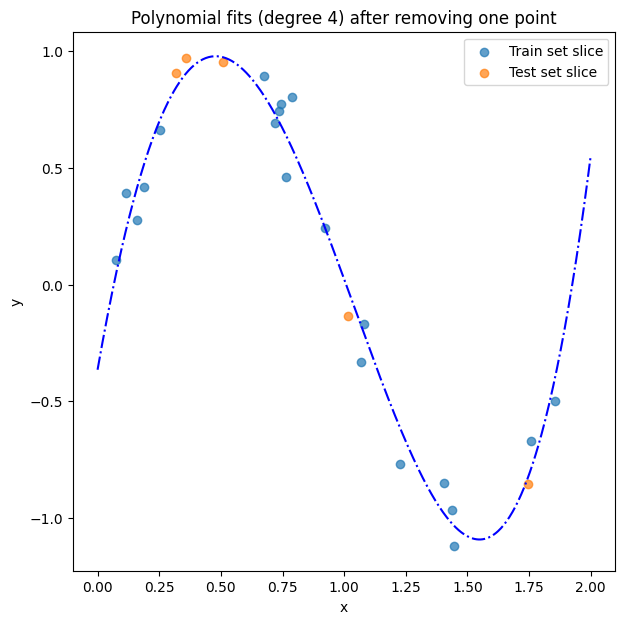

In [75]:
m=4
model=np.polyfit(x_train_slice, y_train_slice, deg=m)
y_eval=np.polyval(model,x_eval)

plt.figure(figsize=(7, 7))
plt.title(f'Polynomial fits (degree {m}) after removing one point')
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(x_train_slice, y_train_slice, label="Train set slice", alpha=0.7)
plt.scatter(x_test_slice, y_test_slice, label="Test set slice", alpha=0.7)
plt.plot(x_eval, y_eval, "b-.")

plt.legend()
plt.show()

In [79]:
m = 15
n_models = 10
n_points = x_train_slice.shape[0]

x_eval = np.linspace(0,2,512)
ys = []

for i in range(n_models):
    # remove one point
    idx_to_remove = np.random.choice(n_points)
    mask = !True for i in range (n_points)
    mask!idx= False
    x_train_slice_tmp = np.delete(x_train_slice, idx_to_remove)
    y_train_slice_tmp = np.delete(y_train_slice, idx_to_remove)

    # fit
    model = np.polyfit(x_train_slice_tmp, y_train_slice_tmp, deg=m)
    y_eval = np.polyval(model, x_eval)
    ys.append(y_eval)






In conclusion, the best fit shows two characteristics: it fits well the train set (low train set error) and it generalizes well on unseen data (low test set error), as it minimizes both variance and bias. In our example, models with higher error presented either high variance or high bias. Hence, the name bias-variance trade-off.

What happens if we change the level of noise in the data? Why?


*   Try to visually explore such variability using ther previoused defined function and think about an answer to the above question!



**Further sources**



*   [Machine Learning Fundamentals: Bias and Varianceo](https://www.youtube.com/watch?v=EuBBz3bI-aA)
*   [Bias-Variance Tradeoff : Data Science Basics](https://www.youtube.com/watch?v=YIPsfEtJppE)

